In [64]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler , LabelEncoder

In [65]:
 data = load_iris().data
df =pd.DataFrame(data, columns =load_iris().feature_names)

In [66]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [67]:
df['class'] = load_iris().target

In [68]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [69]:
sc = StandardScaler() 

In [70]:
scaled_x = sc.fit_transform(df.drop('class', axis =1))

In [71]:
scaled_df =  pd.DataFrame(scaled_x , columns =list(df.columns)[:-1])

In [72]:
scaled_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [73]:
import matplotlib.pyplot as plt

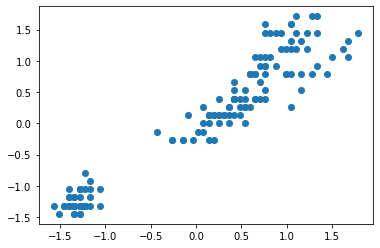

In [74]:
plt.scatter(scaled_df['petal length (cm)'],scaled_df['petal width (cm)'] )

In [75]:
scaled_x

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [76]:
le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])

In [77]:
X = scaled_x
Y = df['class']

In [84]:
kmeans =  KMeans(n_clusters=3, random_state= 1)

In [85]:
kmeans.fit(scaled_x)

KMeans(n_clusters=3, random_state=1)

In [86]:
center =  kmeans.cluster_centers_

In [87]:
center


array([[-0.05021989, -0.88337647,  0.34773781,  0.2815273 ],
       [-1.01457897,  0.85326268, -1.30498732, -1.25489349],
       [ 1.13597027,  0.08842168,  0.99615451,  1.01752612]])

In [88]:
cl = kmeans.fit_predict(X)

In [89]:
cl

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [90]:
temp1 = X[cl==0]
temp2 = X[cl==1]
temp3 = X[cl==2]

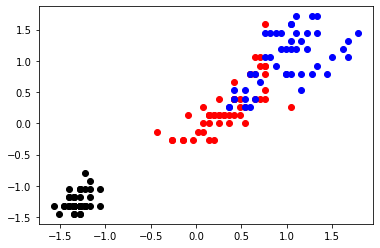

In [93]:
plt.scatter(temp1[:,2] , temp1[:,3] , color = 'red')
plt.scatter(temp2[:,2] , temp2[:,3] , color = 'black')
plt.scatter(temp3[:,2], temp3[:, 3], color='blue')

### DBSCAN

In [96]:
nb = NearestNeighbors(n_neighbors=2)

In [100]:
nbrs =  nb.fit (X)
distances,indices  =nbrs.kneighbors(X)

In [101]:
distances = np.sort (distances, axis= 0)

In [102]:
distances = distances[:,1]

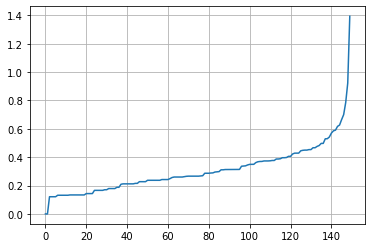

In [103]:
plt.plot(distances)
plt.grid()
plt.show()

In [104]:
dbscan  = DBSCAN(eps = 0.6 ,min_samples=3)
dbscan.fit(X)

DBSCAN(eps=0.6, min_samples=3)

In [107]:
cluster_db =dbscan.fit_predict(X)

In [108]:
cluster_db


array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  2,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,
        3,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  3,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  2,  1,  1,  1,
        1,  1,  1,  1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        3,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [110]:
np.unique(cluster_db)

array([-1,  0,  1,  2,  3], dtype=int64)

In [112]:
temp1 = X[cluster_db==-1]
temp2 = X[cluster_db==0]
temp3 = X[cluster_db==1]
temp4 = X[cluster_db==2]
temp5 = X[cluster_db==3]

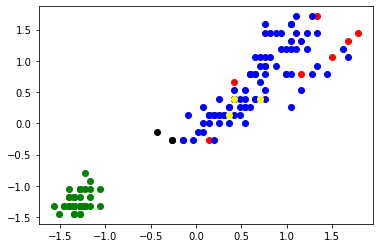

In [115]:
plt.scatter(temp1[:,2] , temp1[:,3] , color = 'red')
plt.scatter(temp2[:,2] , temp2[:,3] , color = 'green')
plt.scatter(temp3[:,2] , temp3[:,3] , color = 'blue')
plt.scatter(temp4[:,2] , temp4[:,3] , color = 'black')
plt.scatter(temp5[:,2] , temp5[:,3] , color = 'yellow')

### Hierachical Clustering

In [116]:
h_clusters = AgglomerativeClustering(n_clusters=3)

In [117]:
h_clusters.fit(X)

AgglomerativeClustering(n_clusters=3)

In [118]:
hr_clusters = h_clusters.fit_predict(X)

In [119]:
hr_clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [120]:
temp1 = X[hr_clusters==0]
temp2 = X[hr_clusters==1]
temp3 = X[hr_clusters==2]


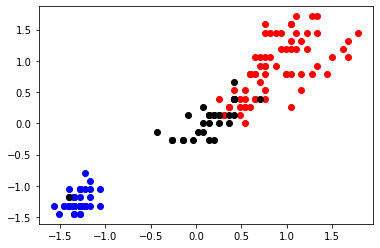

In [121]:
plt.scatter(temp1[:,2] , temp1[:,3] , color='red')
plt.scatter(temp2[:,2] , temp2[:,3] , color='blue')
plt.scatter(temp3[:,2] , temp3[:,3] , color='black')